In [1]:
import numpy as np
import pylab as plb

In [15]:
#titik penghubung antar node, 
#cara membaca (0,1) = saling berhubungan
points_list = [(0,1),(1,6),(5,6),(5,4),(1,2),(2,3),(2,7)]

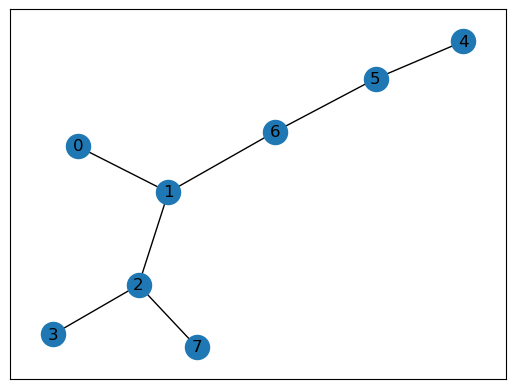

In [17]:
goal = 7

import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plb.show()

In [19]:
MATRIX_SIZE = 8 

R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
print(R)

R *= 1
print(R)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [23]:
for point in points_list:

    if point[1] == goal:
        R[point] = 100
        
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 100
        
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100
R

matrix([[  1.,   0.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  0.,   1.,   0.,   1.,   1.,   1.,   0.,   1.],
        [  1.,   0.,   1.,   0.,   1.,   1.,   1., 100.],
        [  1.,   1.,   0.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   0.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   0.,   1.,   0.,   1.],
        [  1.,   0.,   1.,   1.,   1.,   0.,   1.,   1.],
        [  1.,   1.,   0.,   1.,   1.,   1.,   1., 100.]])

In [31]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_action_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))

    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma *max_value) 

    if(np.max(Q) > 0):
        return (np.sum(Q/np.max(Q)*100))
        
    else:
        return (0)

update(initial_state, action, gamma)

max_value 1.0


/var/folders/yl/ddy486s932lcryq2l23pgqz80000gn/T/ipykernel_20714/860569449.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
/var/folders/yl/ddy486s932lcryq2l23pgqz80000gn/T/ipykernel_20714/860569449.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


100.0

max_value 293.44634972418874
Score:  4269.969818179949
max_value 379.117079779351
Score:  4272.544322029466
max_value 304.2936638234808
Score:  4274.603925109079
max_value 304.2936638234808
Score:  4276.663528188692
max_value 383.4936638234808
Score:  4280.153411184703
max_value 298.917079779351
Score:  4280.153411184703
max_value 304.2936638234808
Score:  4282.213014264316
max_value 304.2936638234808
Score:  4284.27261734393
max_value 299.917079779351
Score:  4284.27261734393
max_value 379.117079779351
Score:  4286.847121193446
max_value 305.99493105878463
Score:  4288.494803657136
max_value 382.4936638234808
Score:  4290.554406736749
max_value 304.2936638234808
Score:  4291.469785883244
max_value 303.2936638234808
Score:  4293.529388962857
max_value 306.99493105878463
Score:  4295.177071426548
max_value 379.117079779351
Score:  4295.177071426548
max_value 306.99493105878463
Score:  4296.824753890238
max_value 303.2936638234808
Score:  4296.824753890238
max_value 304.2936638234808
Sco

/var/folders/yl/ddy486s932lcryq2l23pgqz80000gn/T/ipykernel_20714/860569449.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
/var/folders/yl/ddy486s932lcryq2l23pgqz80000gn/T/ipykernel_20714/860569449.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
/var/folders/yl/ddy486s932lcryq2l23pgqz80000gn/T/ipykernel_20714/860569449.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (De

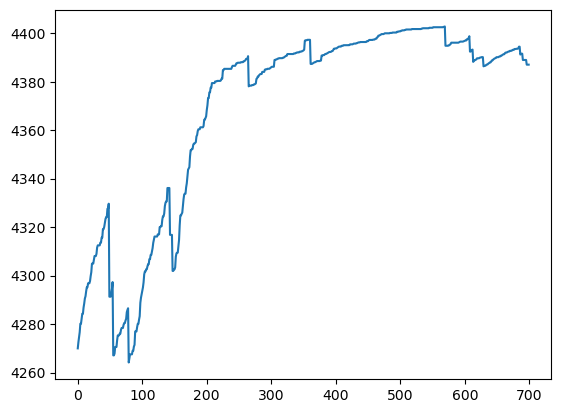

In [35]:
#training 
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update (current_state, action, gamma)
    scores.append(score)
    print('Score: ', str(score))

print('Trained Q Matrix: ')
print(Q/np.max(Q)*100)

#testing
current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else: 
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most Efficient Path: ")
print(steps)

plb.plot(scores)
plb.show()
